<a href="https://colab.research.google.com/github/leandrolustosa/ia-unsupervised-learning/blob/master/trabalho_3_aprendizado_nao_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento do Dataset

In [ ]:
!wget -O yalefaces.zip https://drive.google.com/uc?id=1SvcgZ0_irpp4XTlVbRDiSo6sfxEb0gPT&export=download
!wget -O haarcascade_frontalface_default.xml https://drive.google.com/uc?id=1hCjVJBMOxYQudki2KmzqUMhoVp6fqGqo&export=download

!unzip -q -d images yalefaces.zip -x *.txt *.gif

!ls

--2020-09-25 01:24:28--  https://drive.google.com/uc?id=1SvcgZ0_irpp4XTlVbRDiSo6sfxEb0gPT
Resolving drive.google.com (drive.google.com)... 173.194.216.100, 173.194.216.102, 173.194.216.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvfg863880mf46bar8rpcgkhaco0o4e6/1600997025000/10352870668252494528/*/1SvcgZ0_irpp4XTlVbRDiSo6sfxEb0gPT [following]
--2020-09-25 01:24:30--  https://doc-0g-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvfg863880mf46bar8rpcgkhaco0o4e6/1600997025000/10352870668252494528/*/1SvcgZ0_irpp4XTlVbRDiSo6sfxEb0gPT
Resolving doc-0g-bg-docs.googleusercontent.com (doc-0g-bg-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-0g-bg-docs.googleusercontent.com (doc-0g-bg-docs.googleusercontent.com)|1

# Pré processamento do Dataset

In [ ]:
!pip install sklearn

from sklearn.cluster import KMeans
import cv2

from PIL import Image
import os
import numpy as np
import random
from matplotlib import pyplot as plt

basePath = '/content/images/yalefaces'
items = sorted(os.listdir(basePath))
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
array_images = []
images = []
labels = []

numero = 1

for imagePath in items:

  if ("happy" not in imagePath and "normal" not in imagePath and "sad" not in imagePath and "sleepy" not in imagePath and "surprised" not in imagePath):
    continue

  gif = cv2.VideoCapture(basePath + '/' + imagePath)
  ret, frame = gif.read()

  if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    found = face_cascade.detectMultiScale(gray, 1.1, 4)

    amount_found = len(found)

    if amount_found != 0:

      area = [width * height for (x, y, width, height) in found]

      index = area.index(max(area))

      x, y, width, height = found[index]

      h_adjust = height * 0.2
      w_adjust = width * 0.2

      cropped_img = gray[int(y+h_adjust):y + height, int(x+w_adjust):int(x + width - w_adjust)]
      resized_img = cv2.resize(cropped_img, (50, 50))

      equ = cv2.equalizeHist(resized_img)
      res = np.hstack((resized_img,equ))

      image = res[0:50, 50:100]

      images.append(image)

      arr = np.reshape(image, 50*50)
      array_images.append(arr)
      labels.append(imagePath)

    numero += 1

# Experimentos

cluster: 0 com 5 imagens


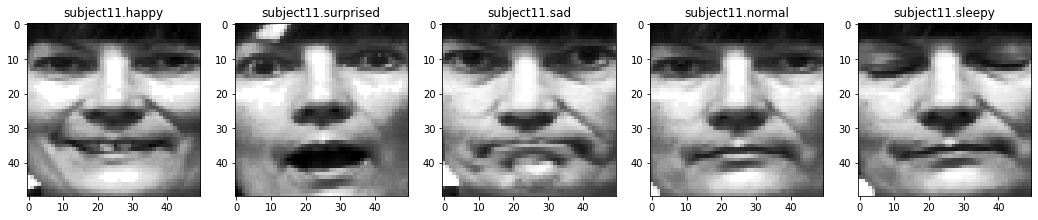

cluster: 1 com 33 imagens


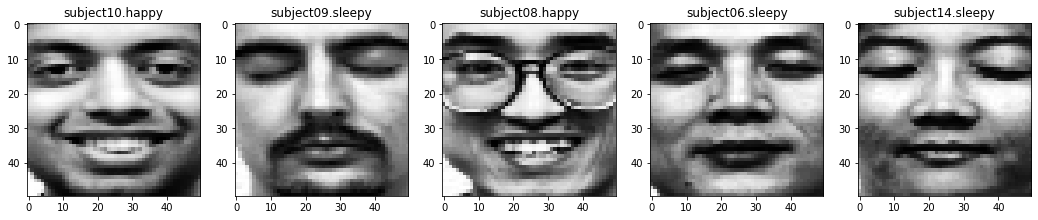

cluster: 2 com 21 imagens


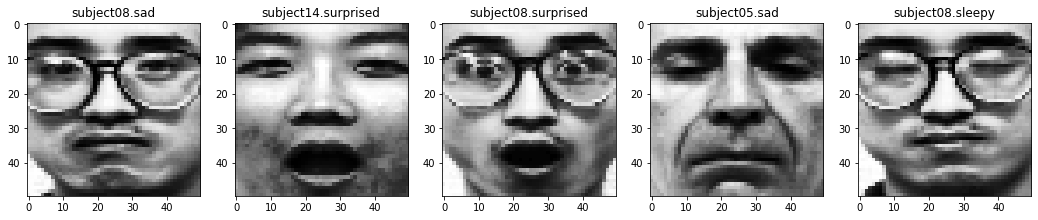

cluster: 3 com 11 imagens


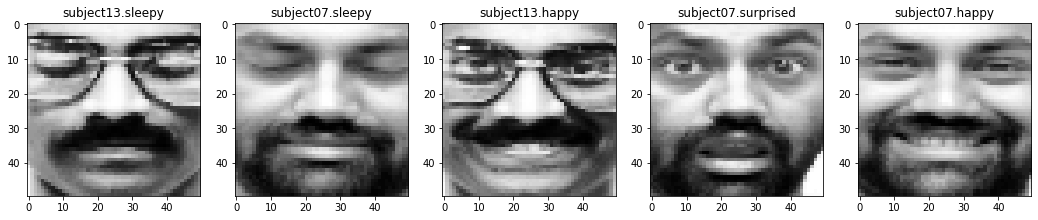

cluster: 4 com 5 imagens


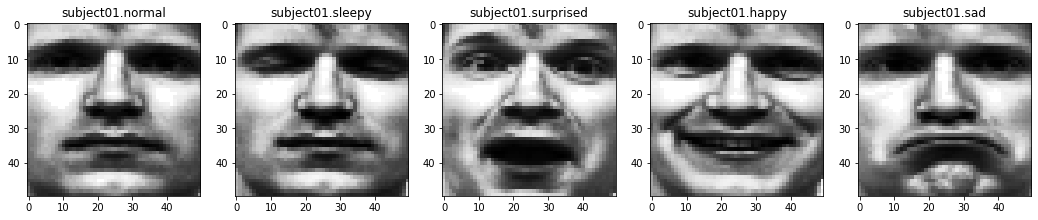

In [ ]:
N_CLUSTERS = 5
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0)
kmeans.fit(array_images)
pred_classes = kmeans.predict(array_images)
labels = np.array(labels)

for cluster in range(N_CLUSTERS):
  pred_images = labels[np.where(pred_classes == cluster)]
  print('cluster: {} com {} imagens'.format(cluster, len(pred_images)))
  indexes = random.sample(range(len(pred_images)), N_CLUSTERS)
  f, axes = plt.subplots(1, N_CLUSTERS, figsize=(18, 18), sharex=True)
  for ax, imgIndex in zip(axes, indexes):
    img = pred_images[imgIndex]
    index, = np.where(labels == img)
    ax.set_title(labels[index[0]])
    ax.imshow(images[index[0]],cmap='gray')
  plt.show()

# K-Means

É um algoritmo de clusterização classificado como aprendizado não supervisionado, pois esse algoritmo apenas recebe dados de entrada como parâmetros, não possui nenhum tipo de rótulo nos dados que permita o algoritmo predizer qualquer informação. O ***K*** representa o número de centróides que serão utilizados para clusterizar os registros do Dataset informado. Os centróide são pontos reais ou imaginários, podendo ou não fazer parte do Dataset. Cada cluster possui um centróide, e os pontos são clusterizados por quão perto eles estão de cada centróide. O ***Means*** significa a média dos dados, ou seja encontrar o seu centróide.

O algoritmo funciona da seguinte forma: A cada iteração do ***k-means***, as amostras são atribuídas ao cluster cujo centróide é o mais próximo à amostra. Depois de fazer isso para todas as amostras, os cetróides são recalculados usando a média dos pontos de cada cluster. Esse processo se repete por um número determinado de iterações ou até que os centróides parem de mudar.

# Conclusão

Devido ao funcionamento do algoritmo ***K-Means*** imagens similares serão classificadas como pertencendo a um mesmo cluster. Podemos reparar, que as imagens são agrupadas ou por fotos de um mesmo indivíduo, ou por características faciais, por exemplo, indivíduos orientais com olhos puxados são tidos, como similares, ou indivíduos que utilizam óculos.